0 - Random Population:  [[0, -0.25, -5.12], [0, -0.51, 7.38], [0, -0.8, -3.97], [0, -0.23, -4.4], [0, -0.12, 0.25], [0, -0.38, 7.51], [0, 0.17, 4.11], [0, 0.72, 4.91], [0, -0.35, -7.07], [0, 0.76, -1.69], [0, 0.01, -5.62], [0, -0.44, 8.56], [0, 0.36, 6.99], [0, -0.15, 4.46], [0, 0.62, -5.51], [0, 0.49, -3.21]]


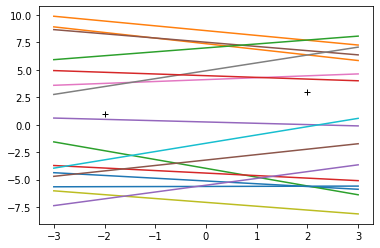

0 - Test Population:  [[0, -0.61, 7.4], [0, -0.5, -4.1], [0, 0.72, -5.1], [0, -0.87, 9.1], [0, 0.2, -2.0], [0, 0.32, 6.3]]


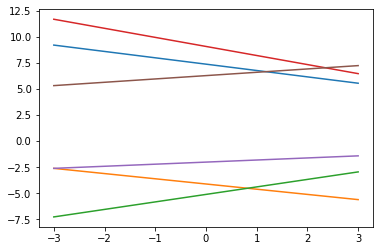

1 - Calculated Errors:  [10.29, 8.12, 9.21, 9.29, 3.03, 8.18, 3.12, 4.16, 13.05, 5.26, 10.86, 9.65, 7.07, 3.95, 10.62, 7.37] 

2-Assembled list
 [[10.29, -0.25, -5.12], [8.12, -0.51, 7.38], [9.21, -0.8, -3.97], [9.29, -0.23, -4.4], [3.03, -0.12, 0.25], [8.18, -0.38, 7.51], [3.12, 0.17, 4.11], [4.16, 0.72, 4.91], [13.05, -0.35, -7.07], [5.26, 0.76, -1.69], [10.86, 0.01, -5.62], [9.65, -0.44, 8.56], [7.07, 0.36, 6.99], [3.95, -0.15, 4.46], [10.62, 0.62, -5.51], [7.37, 0.49, -3.21]]
2-Original list unchanged:
 [[0, -0.25, -5.12], [0, -0.51, 7.38], [0, -0.8, -3.97], [0, -0.23, -4.4], [0, -0.12, 0.25], [0, -0.38, 7.51], [0, 0.17, 4.11], [0, 0.72, 4.91], [0, -0.35, -7.07], [0, 0.76, -1.69], [0, 0.01, -5.62], [0, -0.44, 8.56], [0, 0.36, 6.99], [0, -0.15, 4.46], [0, 0.62, -5.51], [0, 0.49, -3.21]] 

3 - Sorted errors:  [3.03, 3.12, 3.95, 4.16, 5.26, 7.07, 7.37, 8.12, 8.18, 9.21, 9.29, 9.65, 10.29, 10.62, 10.86, 13.05] 

4 - Population sorted by errors: (independent from sorted errors)
 [[3.03,

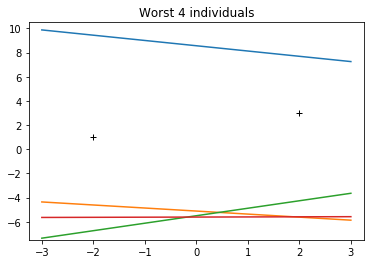

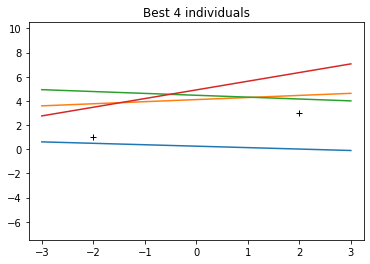

In [6]:
# Genetic Algorithm for Linear Regression - Version 3
# Vinicius Emanoel Ares - 2019/Nov/08
# contact: vearesfem [at] gmail [dot] com
# Version 1 "GeneticAlgorithm.py": 2018/10/06, modified 2018/12/26
# Version 2 "GenAlg2.py": 2018/12/26, updated 2019/02/10, modified 2019/02/27

"""This code is a training of genetic algorithms. Given a set of 2 points in the Cartesian
plane, the program will populate the plane with lines (individuals). Then it will calculate
the errors and create new generations of individuals trying to fit to the 2 points."""

%matplotlib inline
import copy
import matplotlib.pyplot as plt
import numpy as np
import random

def PlotLines(population, x_start=-3, x_end=3):
    """population is a list of individuals
    each individual is a list with [error, slope, intercept]"""
    x_limits = np.array([x_start, x_end]) # x_limits for plot
    for specimen in range(len(population)):
        slope = population[specimen][1] # slope or "a"
        intercept = population[specimen][2] # y-intercept or "b"
        y_values = slope*x_limits + intercept # y = a.x + b
        plt.plot(x_limits, y_values) # 2_points -> plot line
    plt.show()

def GeneratePopulation(size=10):
    population = []
    for specimen in range(size): # line individuals
        slope = random.uniform(-0.9,0.9)
        intercept = random.uniform(-9,9)
        population.append([0, slope, intercept])
    return population # list with [error, slope, intercept]

def CalculateErrors(population, P1, P2):
    er_population = [] # list with error of all specimens
    for specimen in range(len(population)):
        a = population[specimen][1] # get slope
        b = population[specimen][2] # get intercept
        Er1 = a*P1[0]+b - P1[1] # output(ax+b) - desired
        Er2 = a*P2[0]+b - P2[1] # output(ax+b) - desired
        er_specimen = (Er1**2 + Er2**2)**0.5
        er_population.append(er_specimen)
    return er_population

def round_list2D(list_of_lists, decimals=3):
    """Rounds a list of lists to some given number of decimals"""
    rounded_list = [[round(n2, decimals) for n2 in list_of_lists[n1]] for n1 in range(len(list_of_lists))]
    return rounded_list

def TakeFirst(elem):
    return elem[0]

## Main Program

# The exact equation is y=0.5*x + 2
P1 = [-2, 1]
P2 = [2, 3]
p1p2_Xs = [P1[0], P2[0]] # contains the X values of P1 and P2
p1p2_Ys = [P1[1], P2[1]] # contains the Y values of P1 and P2
plt.plot(p1p2_Xs, p1p2_Ys, 'k+') # plots points as black crosses

randompop = GeneratePopulation(16)
print('0 - Random Population: ', round_list2D(randompop, 2))
PlotLines(randompop)

testpop = [[0, -0.61, 7.4], [0, -0.50, -4.1], [0, 0.72, -5.1],
           [0, -0.87, 9.1], [0, 0.20, -2.0], [0, 0.32, 6.3]]
print('0 - Test Population: ', testpop)
PlotLines(testpop)

er_pop = CalculateErrors(randompop, P1, P2)
print('1 - Calculated Errors: ', [round(x, 2) for x in er_pop], '\n')

# Method for assembling lists preserving the original list
auxlist = copy.deepcopy(randompop)
for item in range(len(randompop)):
    auxlist[item][0] = er_pop[item]

print('2-Assembled list\n', round_list2D(auxlist, 2))
print('2-Original list unchanged:\n', round_list2D(randompop, 2), '\n')

sorted_er_pop = sorted(er_pop) # sorted returns the result. Not a deepcopy, beware of side effects
print('3 - Sorted errors: ', [round(x, 2) for x in sorted_er_pop], '\n')

auxlist.sort(key=TakeFirst) # Independent from Sorted errors
print('4 - Population sorted by errors: (independent from sorted errors)\n', round_list2D(auxlist, 2))

plt.title('Worst 4 individuals')
plt.axis([-3.25, 3.25, -7.5, 10.5])
plt.plot(p1p2_Xs, p1p2_Ys, 'k+')
PlotLines(auxlist[-5:-1])
plt.title('Best 4 individuals')
plt.axis([-3.25, 3.25, -7.5, 10.5])
plt.plot(p1p2_Xs, p1p2_Ys, 'k+')
PlotLines(auxlist[0:4])